<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Real Estate Price Prediction Analysis 🏠</h2>
</div>

"""
This analysis explores house sales data from King County, USA, to develop a predictive model
for real estate prices. We'll go through data exploration, preprocessing, model development,
and evaluation to create an accurate price prediction system.
"""

# <a id="2"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Table of Contents 📑</h2>
</div>

"""
1. [Import Libraries](#3)
2. [Data Loading and Exploration](#4)
3. [Data Preprocessing](#5)
4. [Exploratory Data Analysis](#6)
5. [Feature Engineering](#7)
6. [Model Development](#8)
7. [Model Evaluation](#9)
8. [Feature Importance Analysis](#10)
9. [Prediction Analysis](#11)
10. [Results Export](#12)
"""

<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 1: Import Libraries 🛠️</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 2: Data Loading and Exploration 📊</h2>
</div>

In [2]:
df=pd.read_csv("/kaggle/input/king-county-house-sales-usa/house_sales.csv")

In [3]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nNumerical Features Statistics:")
print(df.describe())

Dataset Shape: (22687, 22)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22687 entries, 0 to 22686
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22

<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 3: Data Preprocessing 🔄</h2>
</div>

In [4]:
numerical_features = ['SalePrice', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms', 
                     'BldgGrade', 'YrBuilt', 'SqFtLot', 'LandVal', 'ImpsVal']
df_numerical = df[numerical_features]

<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 4: Exploratory Data Analysis 📈</h2>
</div>

"""
Visual exploration of the data through:
- Correlation analysis
- Distribution analysis
- Feature relationships
"""

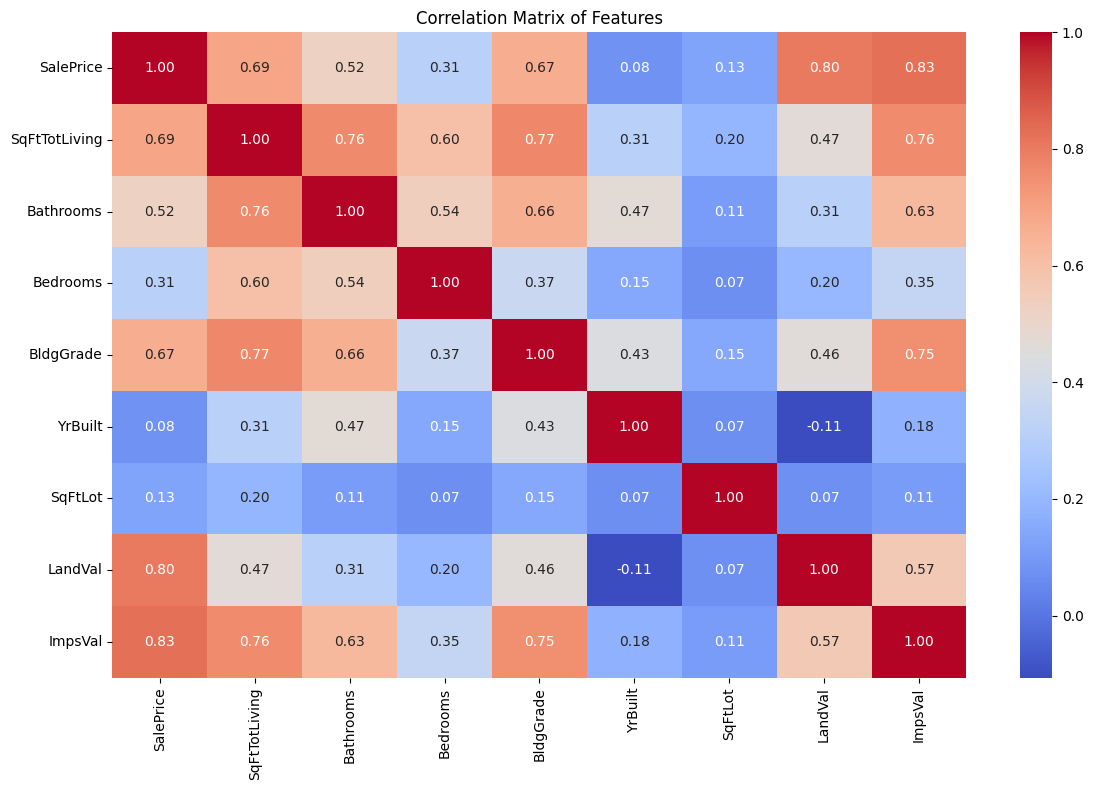

In [5]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

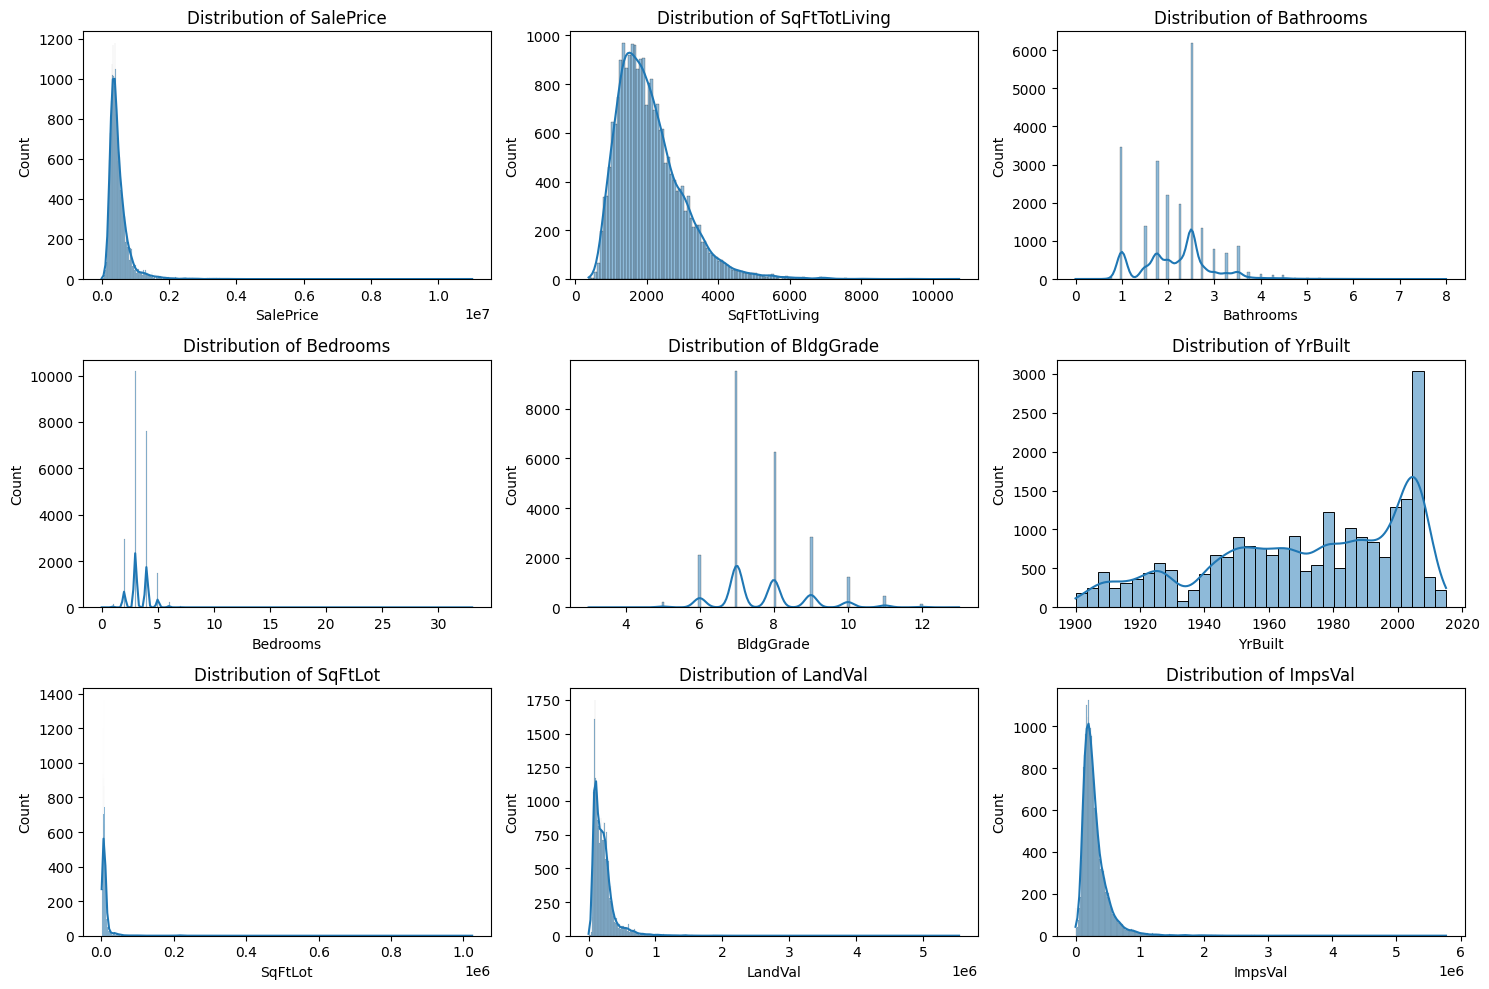

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_numerical[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 5: Feature Engineering 🔧</h2>
</div>

"""
Prepare the data for modeling:
- Feature scaling
- Train-test split
""

In [7]:
X = df_numerical.drop('SalePrice', axis=1)
y = df_numerical['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 6 and 7 : Model Development 🤖 and Model Evaluation 📊</h2>
</div>

"""
Train multiple regression models:
- Linear Regression (baseline)
- Ridge Regression
- Lasso Regression
- Random Forest Regressor
  
Evaluate model performance using various metrics:

RMSE (Root Mean Square Error)
MAE (Mean Absolute Error)
R² Score
"""

In [8]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Print model performance metrics
print("\n=== Model Performance Metrics ===")
metrics_df = pd.DataFrame(results).round(2)
print(metrics_df)


=== Model Performance Metrics ===
      Linear Regression  Ridge Regression  Lasso Regression  Random Forest
RMSE          132320.52         132322.60         132320.49      126710.83
MAE            74607.83          74607.35          74607.66       72065.76
R2                 0.87              0.87              0.87           0.88


<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 8: Feature Importance Analysis 🎯</h2>
</div>

"""
Analyze which features have the most impact on price prediction
using Random Forest feature importance scores
"""

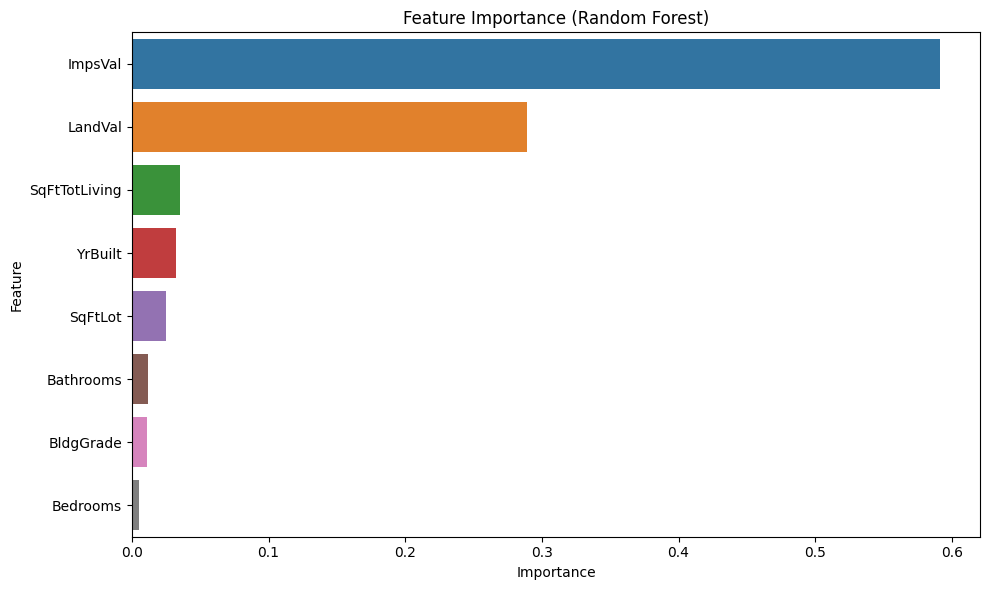

In [9]:
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


# <a id="11"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 9: Prediction Analysis 🔍</h2>
</div>

"""
Analyze prediction accuracy through:
- Actual vs Predicted plot
- Residual analysis
"""

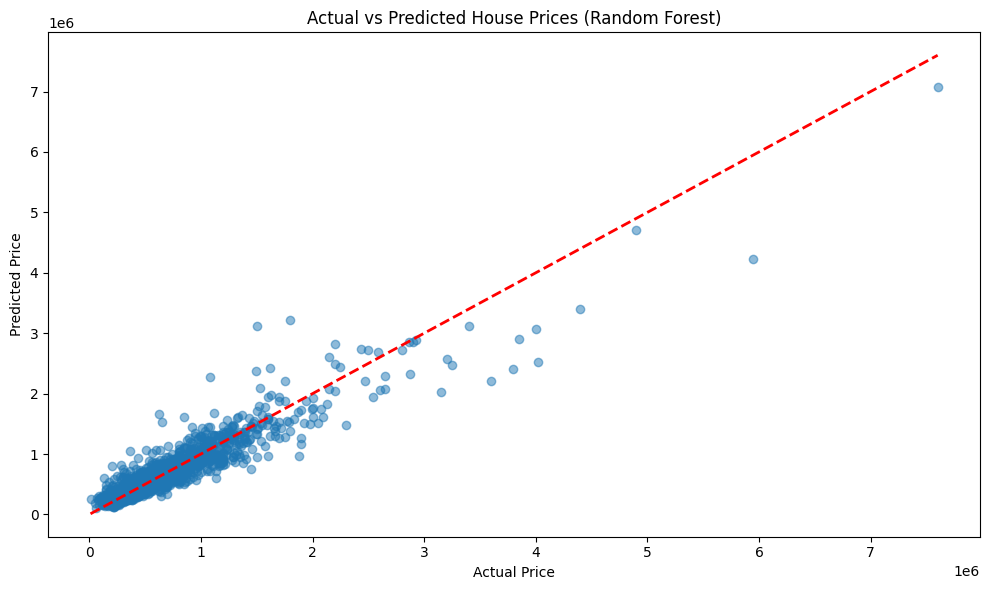

In [10]:
plt.figure(figsize=(10, 6))
y_pred_rf = rf_model.predict(X_test_scaled)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.tight_layout()
plt.show()


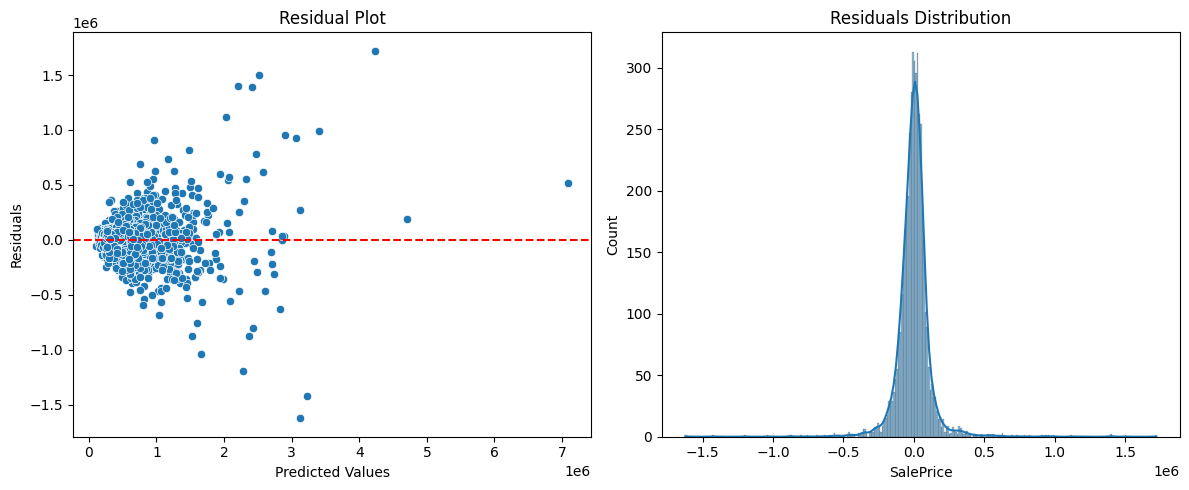

In [11]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 10: Results Export 💾</h2>
</div>

"""
Export prediction results and model performance metrics
for further analysis and reporting
"""

In [12]:
predictions_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': y_pred_rf,
    'Absolute_Error': abs(y_test - y_pred_rf)
})
predictions_df.to_csv('house_price_predictions.csv', index=False)
print("\n=== Sample of Predictions ===")
print(predictions_df.head())


=== Sample of Predictions ===
       Actual_Price  Predicted_Price  Absolute_Error
15255        795000    516810.000000   278190.000000
6119         625000    627539.904000     2539.904000
3519         810100    650804.550000   159295.450000
10281        829900    834827.450000     4927.450000
13469        205000    308091.443333   103091.443333


<div style="background-color: #d9edf7; border-left: 6px solid #31708f; padding: 15px; font-family: Arial, sans-serif;">
    <h2 style="text-align: center; color: #3c3c3c;">
        🚀 Found my analysis and notebook useful? 
    </h2>
    <p style="text-align: center; color: #555;">
        Your feedback would mean the world! 💬 If my work has been helpful, please consider dropping a comment and an upvote. 
        <strong>Your support fuels my drive to create even better insights! 🌟</strong>
    </p>
</div>